In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import torch

In [2]:
def function(x, w):
  return w[3]*x**3 + w[2]*x**2 + w[1]*x + w[0]

def addNoise(y):
  return y + np.random.normal(0, 5, y.shape)

def loss_plt(loss_list):
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.title(f'График потерь')
    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    plt.grid()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.double

#Ход решения
Найдем коэффициенты полиномиальной регрессии
$$y_i = w_0 + w_1x + w_2x^{2} + ... + w_mx^{m},$$
при которых минимизируется среднеквадратичная ошибка
$$MSE = \frac{1}{n}\sum_{i=1}^n(\sum_{j=1}^{m}w_jx_{ij} - y_i)^2$$

Минимизировать будем методом градиентного спуска. Т.к. антиградиент направлен в сторону наискорейшего убывания функции, то будем двигать значения параметров функции в сторону антиградиента $-grad = -\frac{dMSE}{dw_{k}}$ на некоторое значение $\alpha$.

$$\frac{dMSE}{dw_k} = \frac{2}{n}(\sum_{i=1}^{n}error_i)*x^{k} , \ k = 0..m $$

$$w'_{k}=w_{k}-\alpha*\frac{dMSE}{dw_{k}} = w_{k}-\alpha* \frac{2}{n}(\sum_{i=1}^{n}error_i)*x^{k}$$



In [10]:
import torch
import numpy as np

class PolynomialModel():
    def __init__(self, degree):
        self.degree = degree

    def fit(self, x_train, y_train, epochs, learning_rate=0.001, batch_size=1):
        x_train = x_train.view(-1, 1)
        y_train = y_train.view(-1, 1)

        x_new = torch.cat([x_train ** i for i in range(self.degree + 1)], dim=1)
        w = torch.randn(self.degree + 1, dtype=torch.double).view(-1, 1)
        loss_list = []

        for epoch in range(epochs):
            y_pred = x_new.matmul(w)
            error = y_train - y_pred
            loss = torch.mean(error ** 2)
            loss_list.append(loss.item())

            w_grad = -2 / len(x_train) * x_new.t().matmul(error)
            w -= learning_rate * w_grad

            if (epoch + 1) % batch_size == 0:
                print(f"Epoch: {epoch + 1}/{epochs} Loss: {loss:.5e}")

        self.w = w.view(-1)
        return loss_list

    def predict(self, x):
        x = x.view(-1, 1)
        x_new = torch.cat([x ** i for i in range(self.degree + 1)], dim=1)
        y_pred = x_new.matmul(self.w)
        return y_pred


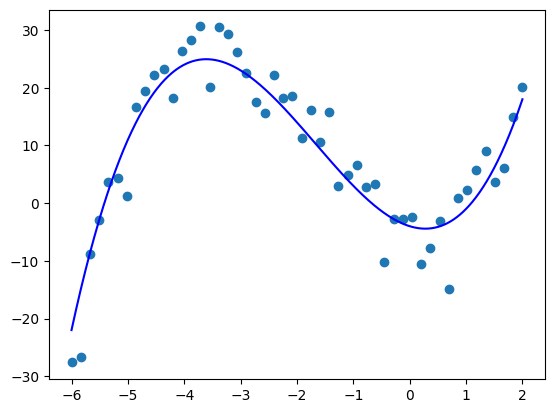

In [4]:
# Пример 1
coeff = [-4, -3, 5, 1]
x = torch.linspace(-6, 2, 50, dtype=dtype, device=device)
y = function(x, coeff)
y_ = addNoise(y).to(dtype)

plt.plot(np.linspace(-6, 2, 1000), function(np.linspace(-6, 2, 1000), coeff), "b")
plt.scatter(x, y_)

Epoch: 1000/10000 Loss: 5.83706e+01
Epoch: 2000/10000 Loss: 3.58456e+01
Epoch: 3000/10000 Loss: 3.14640e+01
Epoch: 4000/10000 Loss: 2.87260e+01
Epoch: 5000/10000 Loss: 2.66966e+01
Epoch: 6000/10000 Loss: 2.51425e+01
Epoch: 7000/10000 Loss: 2.39234e+01
Epoch: 8000/10000 Loss: 2.29456e+01
Epoch: 9000/10000 Loss: 2.21453e+01
Epoch: 10000/10000 Loss: 2.14788e+01


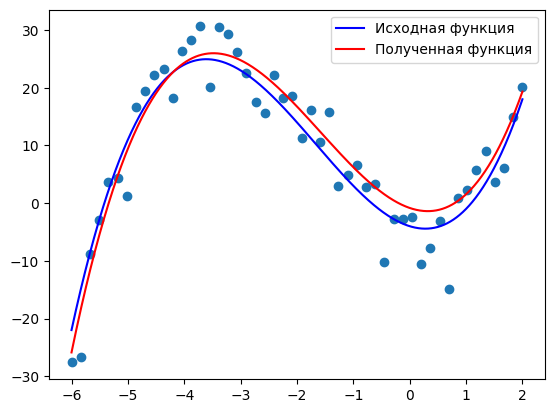

In [11]:
model = PolynomialModel(degree = 3)
loss_list = model.fit(x, y_, epochs = 10000, batch_size = 1000, learning_rate = 0.0001)

plt.plot(np.linspace(-6, 2, 1000), function(np.linspace(-6, 2, 1000), coeff), "b", label='Исходная функция')
x_test = torch.linspace(-6, 2, 1000, dtype=dtype, device=device)
plt.plot(x_test, model.predict(x_test), "r", label='Полученная функция')
plt.scatter(x, y_)
plt.legend()
plt.show()

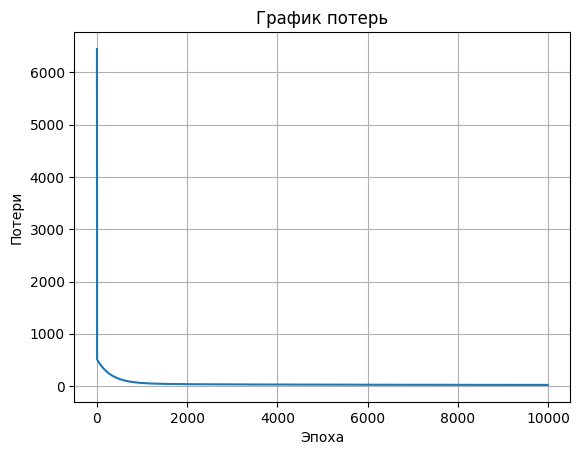

In [12]:
loss_plt(loss_list)

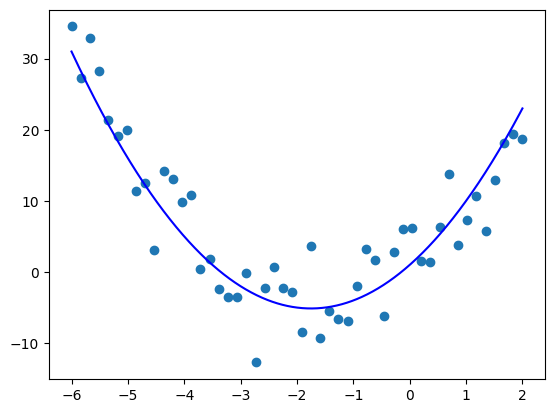

In [13]:
# Пример 2
coeff = [1, 7, 2, 0]
x = torch.linspace(-6, 2, 50, dtype=dtype, device=device)
y = function(x, coeff)
y_ = addNoise(y)

plt.plot(np.linspace(-6, 2, 1000), function(np.linspace(-6, 2, 1000), coeff), "b")
plt.scatter(x, y_)

Epoch: 1000/10000 Loss: 5.46147e+01
Epoch: 2000/10000 Loss: 4.13794e+01
Epoch: 3000/10000 Loss: 3.27449e+01
Epoch: 4000/10000 Loss: 2.70982e+01
Epoch: 5000/10000 Loss: 2.33998e+01
Epoch: 6000/10000 Loss: 2.09726e+01
Epoch: 7000/10000 Loss: 1.93753e+01
Epoch: 8000/10000 Loss: 1.83204e+01
Epoch: 9000/10000 Loss: 1.76204e+01
Epoch: 10000/10000 Loss: 1.71529e+01


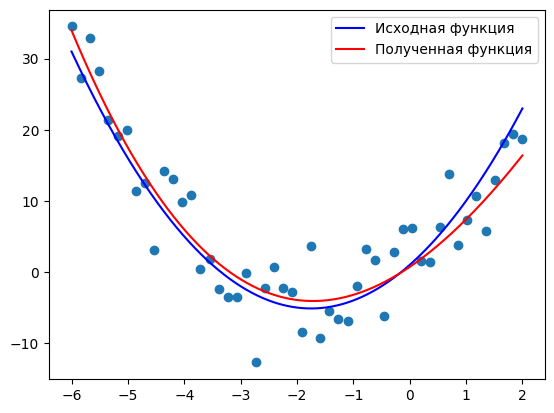

In [14]:
model = PolynomialModel(degree = 3)
loss_list = model.fit(x, y_, epochs = 10000, batch_size = 1000, learning_rate = 0.0001)

plt.plot(np.linspace(-6, 2, 1000), function(np.linspace(-6, 2, 1000), coeff), "b", label='Исходная функция')
x_test = torch.linspace(-6, 2, 1000, dtype=dtype, device=device)
plt.plot(x_test, model.predict(x_test), "r", label='Полученная функция')
plt.scatter(x, y_)
plt.legend()
plt.show()

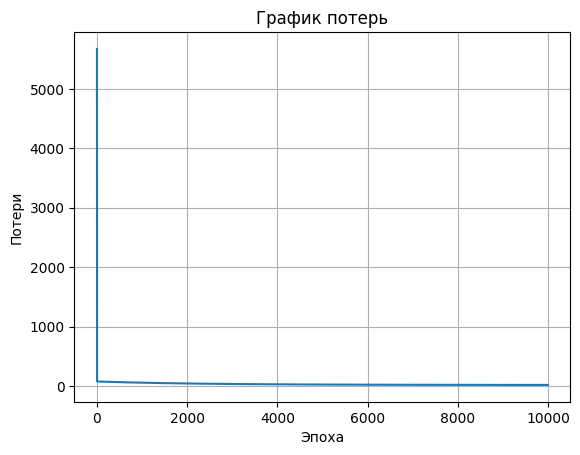

In [15]:
loss_plt(loss_list)

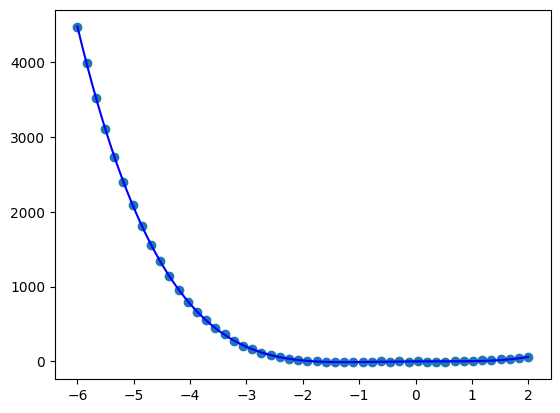

Epoch: 1000/10000 Loss: 6.41627e+03
Epoch: 2000/10000 Loss: 6.16420e+03
Epoch: 3000/10000 Loss: 5.92220e+03
Epoch: 4000/10000 Loss: 5.68987e+03
Epoch: 5000/10000 Loss: 5.46682e+03
Epoch: 6000/10000 Loss: 5.25269e+03
Epoch: 7000/10000 Loss: 5.04712e+03
Epoch: 8000/10000 Loss: 4.84976e+03
Epoch: 9000/10000 Loss: 4.66028e+03
Epoch: 10000/10000 Loss: 4.47838e+03


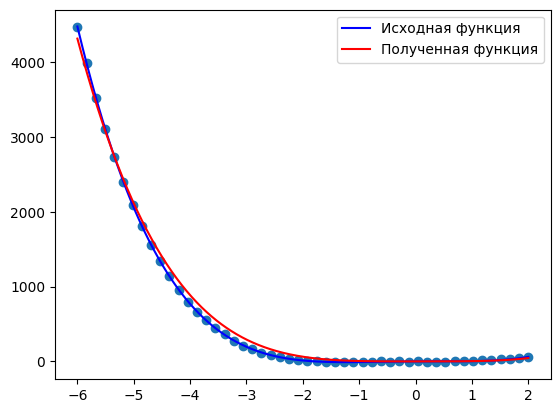

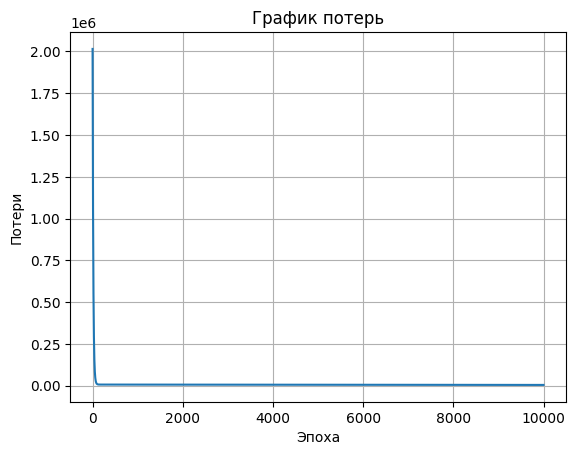

In [31]:
# Пример 3

def function1(x, w):
  return w[4]*x**4 + w[3]*x**3 + w[2]*x**2 + w[1]*x + w[0]

coeff = [1, 4, -7, 2, 4]
x = torch.linspace(-6, 2, 50, dtype=dtype, device=device)
y = function1(x, coeff)
y_ = addNoise(y)

plt.plot(np.linspace(-6, 2, 1000), function1(np.linspace(-6, 2, 1000), coeff), "b")
plt.scatter(x, y_)
plt.show()

model = PolynomialModel(degree = 4)
loss_list = model.fit(x, y_, epochs = 10000, batch_size = 1000, learning_rate = 0.0000001)

plt.plot(np.linspace(-6, 2, 1000), function1(np.linspace(-6, 2, 1000), coeff), "b", label='Исходная функция')
x_test = torch.linspace(-6, 2, 1000, dtype=dtype, device=device)
plt.plot(x_test, model.predict(x_test), "r", label='Полученная функция')
plt.scatter(x, y_)
plt.legend()
plt.show()

loss_plt(loss_list)